In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy as np
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.special import gamma as gammaf
from scipy import stats
import seaborn as sns
import pandas as pd
import random
import time
import re

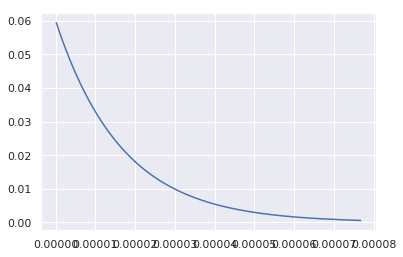

In [53]:
#from data_minion_reads import lire_tailles, lire_taille

def f(x, g, n):
    """
    fonction loi beta qui correspond à la distribution de la taille des reads
    :param x: taille des reads
    :param g: taille du génome
    :param n: nombre de fragments
    :return: fonction loi beta
    """
    return  (1/g)*n* (1 - x) ** (n - 1)

a=1
b=60000
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 1000)
plt.plot(x, f(x,1000000,b))

In [4]:
monFichier = open("../Documents/Donnees/DRR164913.fastq", "r")
taille = []
f = []
norm = []

for line in monFichier:
    fields = line.strip().split()
    for idx, word in enumerate(fields):
        f.append(word)

for i, element in enumerate(f):
    if element.endswith("/1") and i + 1 < len(f):
        taille.append(len(f[i + 1]))

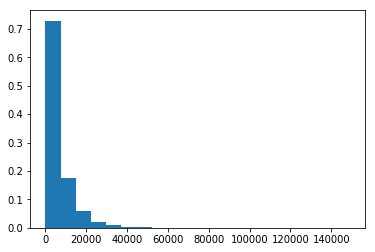

2543005913


In [8]:
weights = np.ones_like(taille) / float(len(taille))
plt.hist(taille, bins=20, weights=weights)
plt.show()
print(sum(taille))

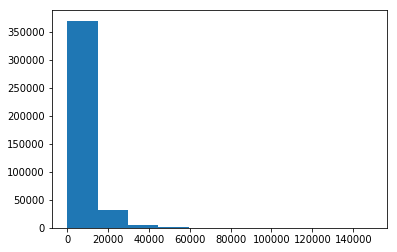

2543005913


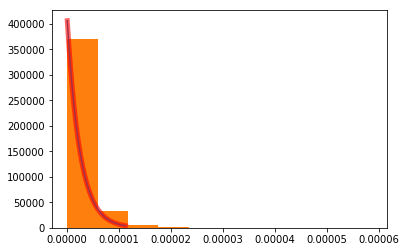

TypeError: 'list' object is not callable

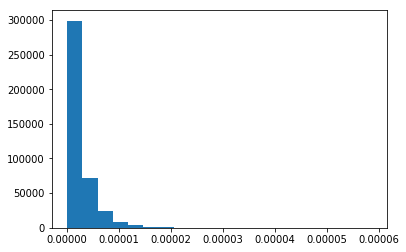

In [9]:
#taille = lire_taille()
a=1
b=len(taille)
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 1000)
plt.hist(taille)
plt.show()
t = sum(taille)
print(t)
taille = [i / t for i in taille]
rv = beta(a, b)
plt.plot(x, rv.pdf(x))
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
plt.hist(taille)
plt.show()

#weights = np.ones_like(taille) / float(len(taille))
plt.hist(taille, bins=20)
plt.plot(x, f(x,t,b))
plt.title("Distribution de la taille des lectures, nombre de lectures = 409995")
plt.xlabel("Taille des lectures en bp")
plt.ylabel("Fréquence")
plt.show()
sns.distplot(taille, kde=False, fit=stats.beta)
plt.show()
print(beta.fit(taille))


In [17]:
def betaNLL(param, *args):
	"""
	Negative log likelihood function for beta
	<param>: list for parameters to be fitted.
	<args>: 1-element array containing the sample data.
	Return <nll>: negative log-likelihood to be minimized.
	"""

	a, b = param
	data = args[0]
	pdf = beta.pdf(data, a, b, loc=0, scale=1)
	lg = numpy.log(pdf)
	# -----Replace -inf with 0s------
	lg = numpy.where(lg == -numpy.inf, 0, lg)
	print(lg)
	nll = -1 * numpy.sum(lg)
	return nll


mean = np.mean(norm)
var = np.var(norm, ddof=1)
alpha1 = mean ** 2 * (1 - mean) / var - mean
beta1 = alpha1 * (1 - mean) / mean

fitted = lambda x, a, b: gammaf(a + b) / gammaf(a) / gammaf(b) * x ** (a - 1) * (1 - x) ** (b - 1)  # pdf of beta

In [15]:
# ------------------Fit using mle------------------
result = fmin(betaNLL, [1, 1], args=(taille,))
alpha2, beta2 = result

# ----------------Fit using beta.fit----------------

alpha3, beta3, axe_abscisse, yy = beta.fit(taille)

print('\n# alpha,beta from moments:', alpha1, beta1)
print('# alpha,beta from mle:', alpha2, beta2)
print('# alpha,beta from beta.fit:', alpha3, beta3)


[0. 0. 0. ... 0. 0. 0.]
[-0.67678066 -0.72913675 -0.69386521 ... -0.61530509 -0.5356845
 -0.62453662]
[0.04879014 0.04879016 0.04879015 ... 0.04879008 0.04878975 0.04879009]
[0.72145508 0.77381119 0.73853963 ... 0.65997945 0.58035852 0.66921099]
[1.41322411 1.51793632 1.44739321 ... 1.29027288 1.13103119 1.30873595]
[1.45555864 1.56027087 1.48972775 ... 1.33260735 1.17336533 1.35107043]
[2.16808323 2.32515157 2.21933689 ... 1.98365629 1.74479326 2.01135092]
[3.49806427 3.75984481 3.58348702 ... 3.19068617 2.79258178 3.23684385]
[5.15586132 5.54853211 5.28399545 ... 4.69479419 4.09763778 4.76403071]
[5.84160261 6.28662953 5.98682129 ... 5.31905977 4.64228201 5.39752785]
[7.86950595 8.48469023 8.07024943 ... 7.14716731 6.21162152 7.25563789]
[10.24757107 11.0983578  10.52519501 ...  9.24859223  7.95475306
  9.3986047 ]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[7.24071824 7.80354638 7.42437715 ... 6.5798553  5.72393085 6.67909432]
[10.64176347 11.54490633 10.93647197 ..

[11.75082996 12.58261325 12.02242022 ... 10.77059045  9.47890558
 10.91824859]
[11.79136045 12.60156735 12.05596826 ... 10.83521221  9.56703598
 10.97941256]
[11.70994721 12.45407325 11.95301635 ... 10.83086772  9.65927651
 10.96356215]
[11.79074795 12.52476167 12.03062155 ... 10.92131664  9.74845021
 11.05284847]
[11.79662217 12.48748313 12.02253088 ... 10.97537341  9.84952427
 11.09998968]
[11.89191967 12.64886149 12.13936705 ... 10.99360216  9.771168
 11.12972435]
[11.95266202 12.71601172 12.20229851 ... 11.0447255   9.79686986
 11.18256157]
[11.88672092 12.53072467 12.0976583  ... 11.11368387 10.00815533
 11.23193586]
[11.84487051 12.40577268 12.02897267 ... 11.16338906 10.13918435
 11.26866685]
[12.00637234 12.63976324 12.21420228 ... 11.23820312 10.09199192
 11.35670072]
[12.06023785 12.66489374 12.25902842 ... 11.3186084  10.16221617
 11.43404668]
[11.82562673 12.22783507 11.95888296 ... 11.31045235 10.37771104
 11.39333235]
[12.01382476 12.45978683 12.16176941 ... 11.43850239 1

[12.72542412 12.8845726  12.79276916 ... 12.20951357  9.50529585
 12.32930346]
[12.72542385 12.88457324 12.79276916 ... 12.2095128   9.50529797
 12.3293027 ]
[12.72542358 12.88457387 12.79276916 ... 12.20951204  9.5053001
 12.32930194]
[12.72542344 12.88457442 12.79276923 ... 12.2095115   9.50530148
 12.32930141]
[12.72542372 12.88457426 12.79276938 ... 12.20951193  9.50529999
 12.32930186]
[12.72542361 12.88457397 12.79276921 ... 12.20951201  9.50530007
 12.32930192]
[12.72542365 12.88457407 12.79276927 ... 12.20951199  9.50530005
 12.3293019 ]
[12.72542371 12.88457379 12.79276923 ... 12.20951226  9.50529935
 12.32930217]
[12.72542378 12.88457399 12.79276934 ... 12.2095122   9.5052993
 12.32930213]
[12.72542373 12.88457384 12.79276926 ... 12.20951225  9.50529934
 12.32930216]
[12.72542377 12.88457394 12.79276931 ... 12.20951222  9.50529931
 12.32930214]
[12.72542376 12.88457391 12.7927693  ... 12.20951223  9.50529932
 12.32930214]
[12.72542375 12.88457389 12.79276928 ... 12.20951223  

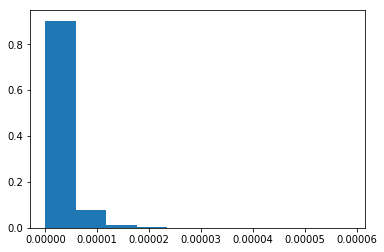

/home/aghoul/venv/local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


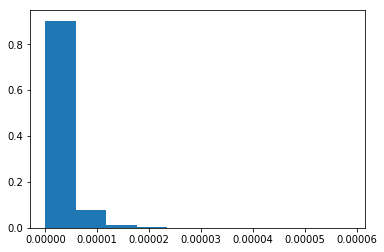

409995


In [18]:
weights = np.ones_like(taille) / float(len(taille))
x = np.linspace(beta.ppf(0.01, alpha3, beta3), beta.ppf(0.99, alpha3, beta3), 1000)
plt.hist(taille, weights=weights)
plt.show()


plt.plot(x, fitted(x, alpha1, beta1), 'g')
plt.plot(x, fitted(x, alpha2, beta2), 'b')
plt.plot(x, fitted(x, alpha3, beta3), 'r')


plt.hist(taille, weights=weights)

plt.show()

print(len(taille))
if __name__ == '__main__':
	pass
